Dataset Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

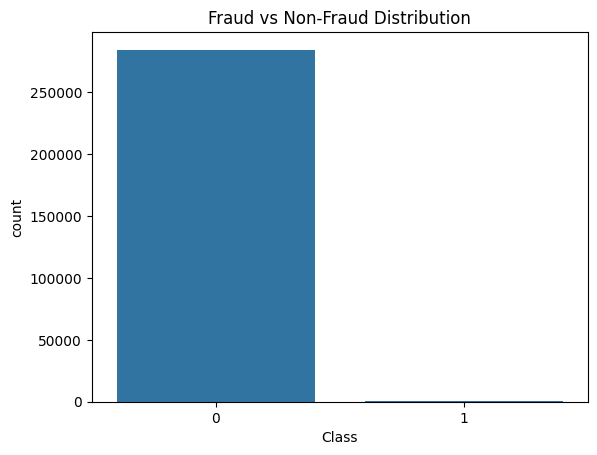

Train Fraud Ratio: 0.001729245759178389
Test Fraud Ratio: 0.0017204452090867595


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.69      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962


--- Random Forest Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



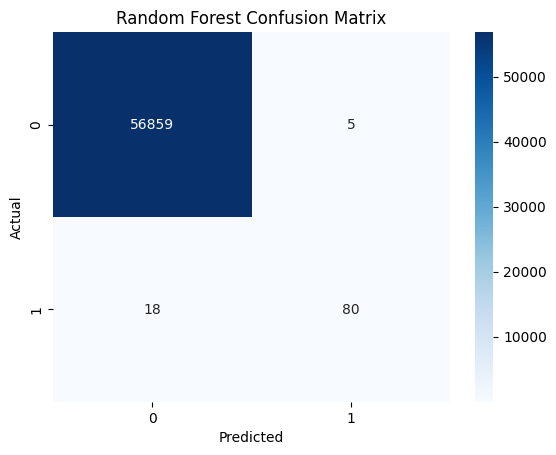


Top 10 Important Features:
   Feature  Importance
17     V17    0.170325
14     V14    0.136363
12     V12    0.133326
10     V10    0.074073
16     V16    0.071792
11     V11    0.045277
9       V9    0.031127
4       V4    0.030496
18     V18    0.028156
7       V7    0.024627


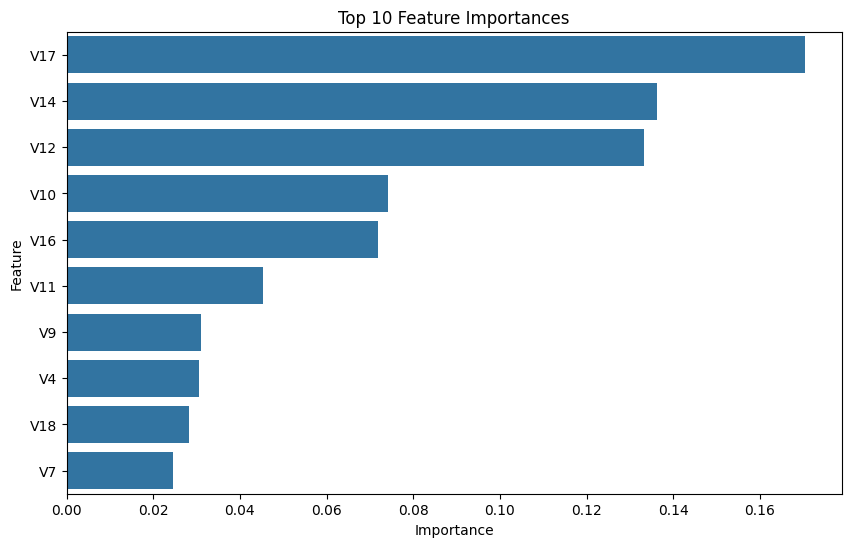


Model saved as: best_fraud_detection_model.pkl


In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


#Load Dataset

file_path = r"/content/creditcard.csv"
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print(df.head())

#Fraud vs Non-Fraud Count

fraud_counts = df["Class"].value_counts()
print("\nFraud vs Non-Fraud Count:")
print(fraud_counts)

sns.countplot(x="Class", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


#Separate Features and Target

X = df.drop(columns=["Class"])
y = df["Class"]


#Stratified Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train Fraud Ratio:", y_train.mean())
print("Test Fraud Ratio:", y_test.mean())


#Baseline Model - Logistic Regression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

print("\n--- Logistic Regression Results ---")
print(classification_report(y_test, log_preds))


#Random Forest Model

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("\n--- Random Forest Results ---")
print(classification_report(y_test, rf_preds))

# -------------------------------
# 7. Confusion Matrix (Random Forest)
# -------------------------------
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Feature Importance Plot

importances = rf_model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Important Features:")
print(feature_df.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_df.head(10))
plt.title("Top 10 Feature Importances")
plt.show()

#Save Best Model

joblib.dump(rf_model, "best_fraud_detection_model.pkl")

print("\nModel saved as: best_fraud_detection_model.pkl")
